In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Genetic drift

In [4]:
# N- population size, p - allele A frequency, t - number of generation

def WF_simulation(N, p, t):
    
    # allele B frequency
    q = 1 - p
    
    population = np.random.choice([0, 1], size = N, p = [p, q])
    
    A_freq = []
    B_freq = []
    
    for generation in range(t):
        # calculate allele frequencies 
        freq_A = np.sum(population == 0) / N
        freq_B = np.sum(population == 1) / N

        A_freq.append(freq_A)
        B_freq.append(freq_B)
        
        next_generation = np.random.choice(population, size=N)
        
        population = next_generation
        
    return (A_freq, B_freq)

##  1.a trace the allele frequencies over time; 

In [25]:
a_freq, b_freq = WF_simulation(1000, 0.5, 10000)

In [26]:
def plot_frequencys(A_allele, B_allele):
    # Plot the results
    plt.plot(range(len(A_allele)), a_freq, label='Allele A', marker='o', linestyle='-', color='b')
    plt.plot(range(len(B_allele)), b_freq, label='Allele B', marker='o', linestyle='-', color='r')
    plt.title('Wright-Fisher Simulation')
    plt.xlabel('Generations')
    plt.ylabel('Allele Frequency')
    plt.legend()
    plt.show()

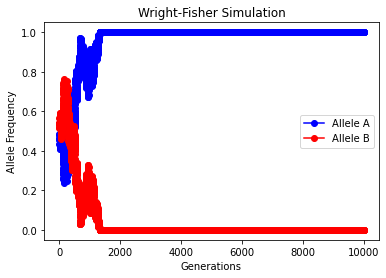

In [28]:
plot_frequencys(a_freq, b_freq)

## 1.b Determine the fixation probability of allele A in dependence of p

In [57]:
def find_fixation_A(freq_a):
    flag = 0
    if (1 in freq_a):
        flag = 1
        #fix_allele = 'A'
    return flag

In [52]:
mean_value

1498.87

In [61]:
def fixation_a_allele (n_simulations, p_A):   
    A_fixation = 0
    for i in range(n_simulations):
        a_freq, b_freq = WF_simulation(1000, p_A, 10000)
        
        #check if A fixed
        if (1 in a_freq):
            A_fixation += 1
    A_fix_proba = round(A_fixation/n_simulations, 2)
    return A_fix_proba

In [62]:
check = fixation_a_allele(100, 0.5)

In [63]:
check

0.42

In [70]:
p_list = []
for i in range(1, 10):
    p_list.append(i / 10.0)
p_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [65]:
fix_a_for_diff_p = []
for pa in p_list:
    fix_a_for_diff_p.append(fixation_a_allele(100, pa))

In [66]:
# 
fix_a_for_diff_p

[0.12, 0.23, 0.35, 0.39, 0.52, 0.66, 0.74, 0.78, 0.87]

In [67]:
p_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

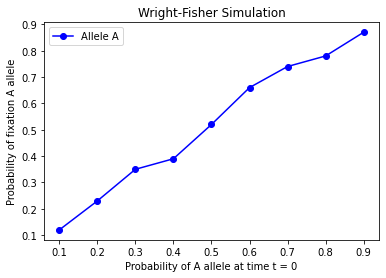

In [69]:
plt.plot(p_list, fix_a_for_diff_p, label='Allele A', marker='o', linestyle='-', color='b')
plt.title('Wright-Fisher Simulation')
plt.xlabel('Probability of A allele at time t = 0')
plt.ylabel('Probability of fixation A allele')
plt.legend()
plt.show()

## 1.c Estimate the expected fixation time (number of generations) in dependence of N (haploid individuals)

In [71]:
def find_fixation_t(freq_list):
    if (1 in freq_list):
        index = freq_list.index(1)
    else:
        index = freq_list.index(0)
    return index

In [95]:
N_list = [10, 50, 100, 200, 300, 400, 500, 600, 1000, 2000]

In [73]:
def estimate_expected_fix_time(population_size):
    
    # list with number of generation until fixation
    fix_time = []

    for i in range(100):
        a_freq, b_freq = WF_simulation(population_size, 0.5, 10000)
        fix_time.append(find_fixation_t(a_freq))
        
    #mean of fix_time for 100 simaulations
    mean_fix_time = np.mean(fix_time)
    
    return mean_fix_time

In [74]:
estimate_expected_fix_time(1000)

1385.59

In [91]:
mean_fix_time_list = []
for pop_size in N_list:
    x = estimate_expected_fix_time(pop_size)
    mean_fix_time_list.append(x)
    print(f'For population size = {pop_size}, expected fixation time (number of generations) = {x} generations \n')

For population size = 10, expected fixation time (number of generations) = 12.18 generations 

For population size = 50, expected fixation time (number of generations) = 67.46 generations 

For population size = 100, expected fixation time (number of generations) = 141.68 generations 

For population size = 200, expected fixation time (number of generations) = 255.94 generations 

For population size = 300, expected fixation time (number of generations) = 430.5 generations 

For population size = 400, expected fixation time (number of generations) = 504.36 generations 

For population size = 500, expected fixation time (number of generations) = 690.64 generations 

For population size = 600, expected fixation time (number of generations) = 825.17 generations 

For population size = 1000, expected fixation time (number of generations) = 1265.16 generations 

For population size = 2000, expected fixation time (number of generations) = 2654.98 generations 



ValueError: 0 is not in list

In [93]:
mean_fix_time_list

[12.18, 67.46, 141.68, 255.94, 430.5, 504.36, 690.64, 825.17, 1265.16, 2654.98]

In [96]:
N_list

[10, 50, 100, 200, 300, 400, 500, 600, 1000, 2000]

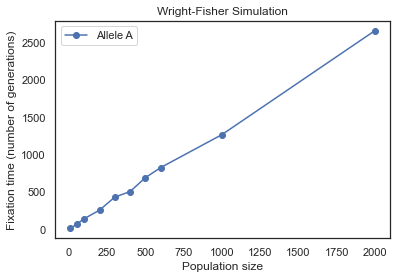

In [97]:
plt.plot(N_list, mean_fix_time_list, label='Allele A', marker='o', linestyle='-', color='b')
plt.title('Wright-Fisher Simulation')
plt.xlabel('Population size')
plt.ylabel('Fixation time (number of generations)')
plt.legend()
plt.show()

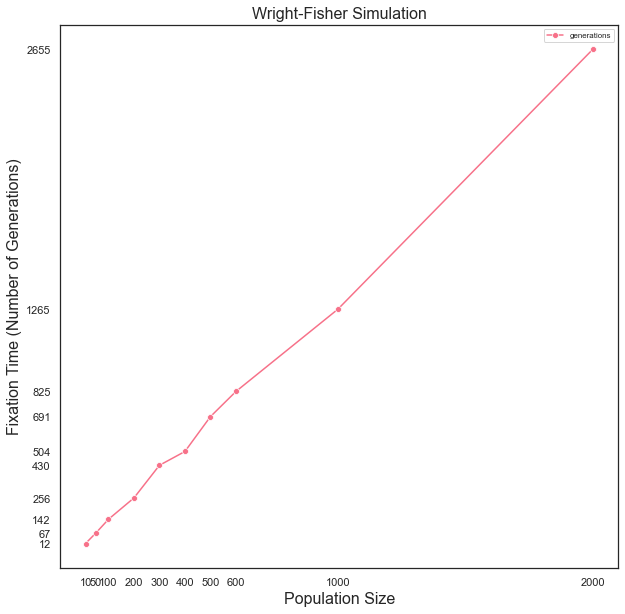

In [108]:
import seaborn as sns


# Set Seaborn style
sns.set(style="white")

# Plot with Seaborn
plt.figure(figsize=(10, 10))

# Use Seaborn's color palette for better aesthetics
palette = sns.color_palette("husl", 2)

sns.lineplot(x=N_list, y=mean_fix_time_list, marker='o', color=palette[0], label='generations')

plt.title('Wright-Fisher Simulation', fontsize=16)
plt.xlabel('Population Size', fontsize=16)
plt.ylabel('Fixation Time (Number of Generations)', fontsize=16)

plt.xticks(N_list)
plt.yticks(mean_fix_time_list)

plt.legend(fontsize=8)
plt.show()

# 2. Coalescent model

In [118]:
len(set(population))

100

In [224]:
def simulate_populations_for_CE(N):    
    #initialisation 
    population = np.array([[i, -1] for i in range(N)])
    populations = []
    populations.append(population)

    flag = 0
    # stop when all common by descent
    while flag == 0:

        next_generation = np.zeros((N, 2))
        population = populations[-1]
        for individual in next_generation:
            parents = np.random.choice(N, size=N)
            for parent in parents:
                individual[0] = population[parent][0]
                individual[1] = parent

        populations.append(next_generation)
        invividuals = [invividual[0] for invividual in next_generation]

        if len(set(invividuals)) == 1:
            flag = 1
        
    return populations

In [229]:
check = simulate_populations_for_CE(100)

In [214]:
print (f'Number of generations N = {len(populations)}')

Number of generations N = 199


In [211]:
# number of samples
n = 2
def find_coalescent_event(n):
    check_parents_samples = np.random.choice(100, size=n)
    t = 1
    flag = 0
    #print (f'check_parents_samples = {check_parents_samples} \n') 
    while flag == 0:
        population = populations[-t]
        parents = []
        for sample in check_parents_samples:
            #print (sample)
            who_was_parent = population[int(sample)][1]
            if  who_was_parent not in parents:
                parents.append(int(who_was_parent))
        #print (f't - {t} generation, parents = {parents} \n')
        if len(parents) == 1:
            flag = 1
            #print (f'Coalescence event on generation t - {t}')
        else : 
            t += 1
            check_parents_samples = parents
    return t

In [213]:
find_coalescent_event(2)

25

In [239]:
for i in range (5):
    populations = simulate_populations_for_CE(100)
    print (f'\nNumber of generations N = {len(populations)}\n')
    number_of_samples = [2, 3, 4, 5]

    for n in number_of_samples:
        #print (f'Number of random samples = {n}\n')
        coalescent_event_times = []
        for i in range(100):
            coalescent_event_times.append(find_coalescent_event(n))
        mean_fix_time = round(np.mean(coalescent_event_times))
        variance_fix_time = round(np.std(coalescent_event_times))
        print (f'For {n} samples, mean number of generations to coalescent event = {mean_fix_time} +- {variance_fix_time}')


Number of generations N = 95

For 2 samples, mean number of generations to coalescent event = 60 +- 28
For 3 samples, mean number of generations to coalescent event = 69 +- 20
For 4 samples, mean number of generations to coalescent event = 75 +- 15
For 5 samples, mean number of generations to coalescent event = 78 +- 7

Number of generations N = 207

For 2 samples, mean number of generations to coalescent event = 41 +- 23
For 3 samples, mean number of generations to coalescent event = 53 +- 23
For 4 samples, mean number of generations to coalescent event = 60 +- 20
For 5 samples, mean number of generations to coalescent event = 61 +- 20

Number of generations N = 82

For 2 samples, mean number of generations to coalescent event = 52 +- 27
For 3 samples, mean number of generations to coalescent event = 69 +- 17
For 4 samples, mean number of generations to coalescent event = 71 +- 13
For 5 samples, mean number of generations to coalescent event = 75 +- 8

Number of generations N = 148



# 3. Mutations in the infinite-allele model

In [34]:
"""
pop_size - number of individuals in population
num_of_generations - number of generations
m - mutation rate
"""
def simulation_with_mutations(pop_size, num_of_generations, m):
    population = np.zeros(pop_size)
    populations = []
    populations.append(population)
    mutation = 1
    n = 1
    
    while n < num_of_generations:
        n+=1
        next_generation = np.random.choice(population, size=pop_size)
        
        for i in range(pop_size):
            is_mutated = np.random.choice([0, 1], p = [1-m, m])
            # mutation
            if (is_mutated == 1):
                next_generation[i] = mutation
                mutation += 1
                
        populations.append(next_generation)
        population = next_generation
                
    return populations

In [45]:
new_pop = simulation_with_mutations(1000, 1000, 0.01)

In [50]:
from collections import Counter

# calculate the fixation index (probability that two randomly chosen alleles are identical) 

def calculate_fixation_index(population):
    counts = Counter(population)
    pop_size = len(population)
    proba_same_alleles = 0
    for allele_count in counts.values():
        proba_same_alleles += (allele_count / pop_size) * ((allele_count - 1) / (pop_size - 1))
    
    return proba_same_alleles

In [51]:
fix_index_list = []

for population in new_pop:
    fix_index_list.append(calculate_fixation_index(population))

In [52]:
len(fix_index_list)

1000

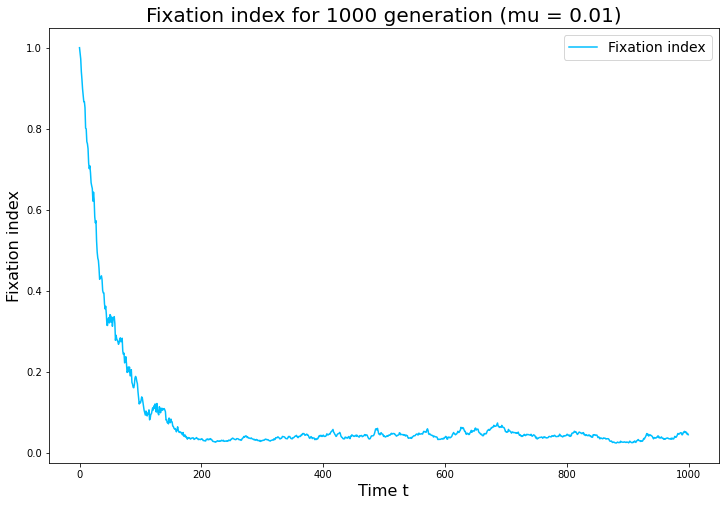

In [76]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(fix_index_list)), fix_index_list, label='Fixation index', linestyle='-', color='deepskyblue')
plt.title('Fixation index for 1000 generation (mu = 0.01)', fontsize=20)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [62]:
new_pop_10000 = simulation_with_mutations(1000, 10000, 0.01)

In [63]:
fix_index_list_10000 = []

for population in new_pop_10000:
    fix_index_list_10000.append(calculate_fixation_index(population))

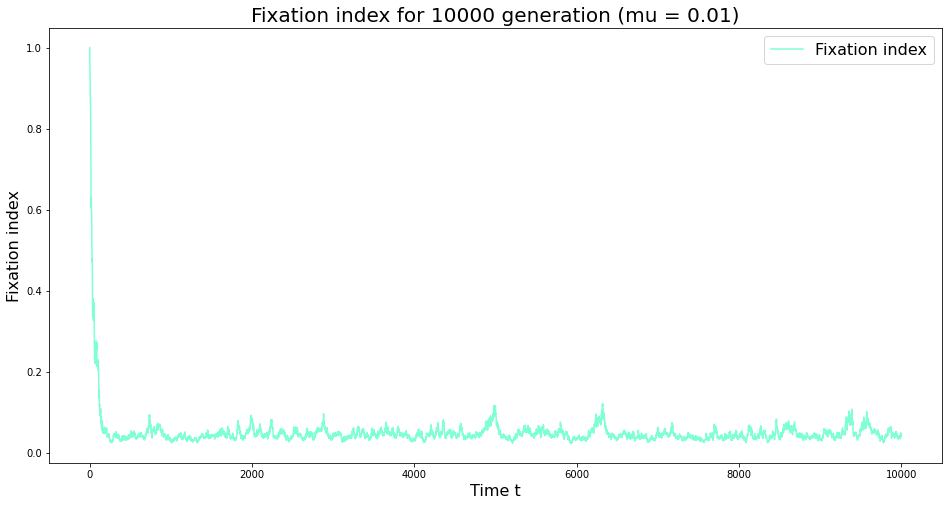

In [77]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(fix_index_list_10000)), fix_index_list_10000, label='Fixation index', linestyle='-', color='aquamarine')
plt.title('Fixation index for 10000 generation (mu = 0.01)', fontsize=20)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=16)
plt.show()

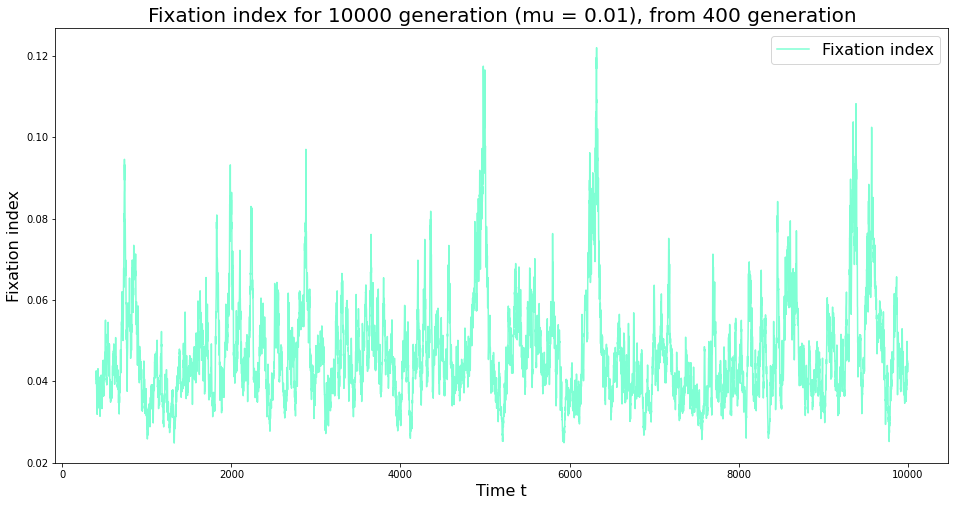

In [79]:
plt.figure(figsize=(16, 8))
plt.plot(range(400, len(fix_index_list_10000)), fix_index_list_10000[400:], label='Fixation index', linestyle='-', color='aquamarine')
plt.title('Fixation index for 10000 generation (mu = 0.01), from 400 generation', fontsize=20)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Fixation index', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# 4. Selection

In [80]:
def selection_simulation(pop_size, num_of_generations, s):
    
    # initial A frequency
    p0 = 0.5
    # initial B frequency
    q0 = 0.5
    
    population = np.random.choice([0, 1], size = pop_size, p = [p0, q0])
    populations = []
    populations.append(population)
    
    A_freq = []
    B_freq = []
    
    for generation in range(num_of_generations):
        # calculate allele frequencies 
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size

        A_freq.append(freq_A)
        B_freq.append(freq_B)
        
        p_next = (1 * freq_A) / (1 * freq_A + (1 + s) * freq_B)
        q_next = ((1 + s) * freq_B ) / (1 * freq_A + (1 + s) * freq_B)
        
        next_generation = np.random.choice([0, 1], size = pop_size, p = [p_next, q_next])
        populations.append(next_generation)
        population = next_generation
        
    return populations, A_freq, B_freq

In [112]:
populations_pos, A_freq_pos, B_freq_pos = selection_simulation(1000, 1000, 0.01)

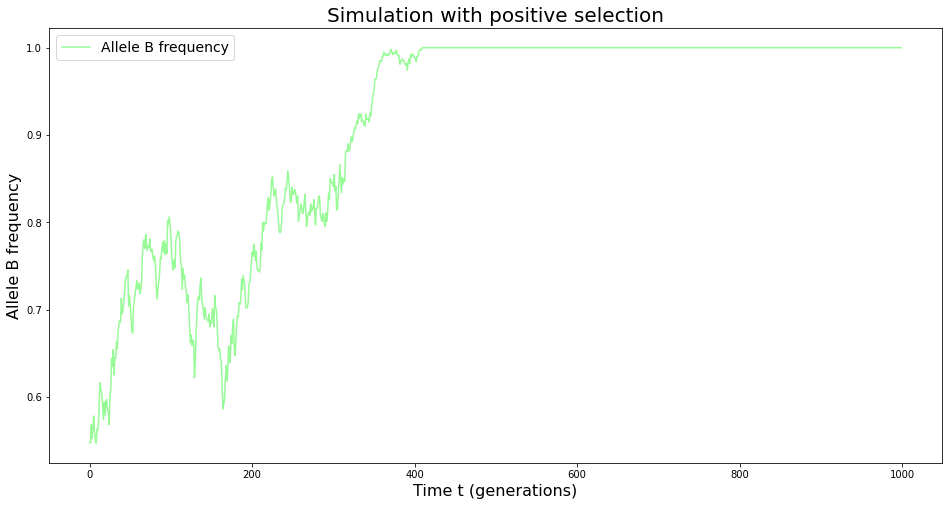

In [119]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(B_freq_pos)), B_freq_pos, label='Allele B frequency', linestyle='-', color='palegreen')
plt.title ('Simulation with positive selection', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele B frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [116]:
populations_neg, A_freq_neg, B_freq_neg = selection_simulation(1000, 2000, -0.001)

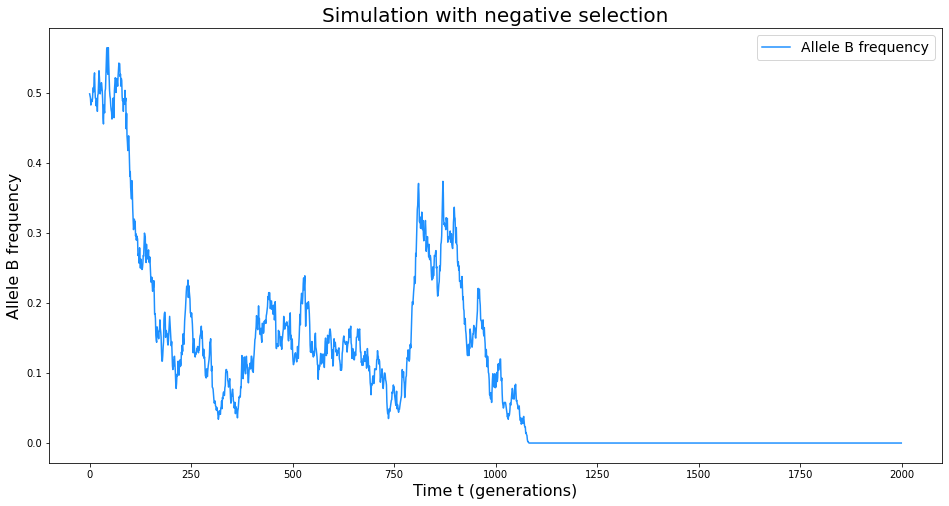

In [120]:
plt.figure(figsize=(16, 8))
plt.plot(range(2000), B_freq_neg, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.title ('Simulation with negative selection', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele B frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# 5. Clonal interference

In [121]:
def clonal_interference_simulation(pop_size, num_of_generations, s1, s2, s3):
    
    # initial A frequency
    pA_0 = 0.79
    # initial B frequency
    pB_0  = 0.2
    # initial C frequency
    pC_0  = 0.01
    
    population = np.random.choice([0, 1, 2], size = pop_size, p = [pA_0, pB_0, pC_0])
    populations = []
    populations.append(population)
    
    A_freq = []
    B_freq = []
    C_freq = []
    
    for generation in range(num_of_generations):
        # calculate allele frequencies 
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size
        freq_C = np.sum(population == 2) / pop_size
        
        A_freq.append(freq_A)
        B_freq.append(freq_B)
        C_freq.append(freq_C)
        
        sum_to_normalise = (1 + s1) * freq_A + (1 + s2) * freq_B + (1 + s3) * freq_C
        
        pA_next = ((1 + s1) * freq_A) / sum_to_normalise
        pB_next = ((1 + s2) * freq_B ) / sum_to_normalise
        pC_next = ((1 + s3) * freq_C) / sum_to_normalise
        
        next_generation = np.random.choice([0, 1, 2], size = pop_size, p = [pA_next, pB_next, pC_next])
        populations.append(next_generation)
        population = next_generation
        
    return populations, A_freq, B_freq, C_freq

In [126]:
CI_pop_100, A_freq_100, B_freq_100, C_freq_100 = clonal_interference_simulation(100, 1000, 0, 0.05, 0.1)

In [124]:
CI_pop_100[-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

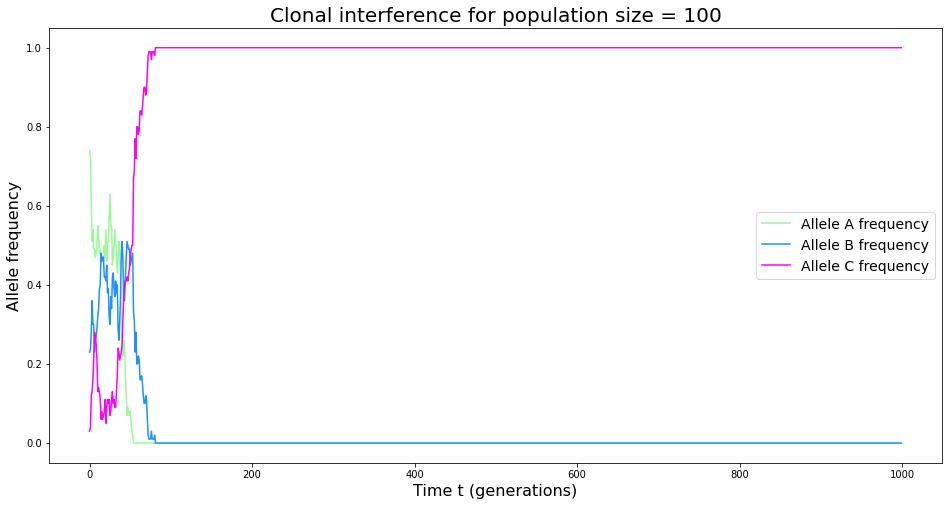

In [129]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(A_freq_100)), A_freq_100, label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(len(A_freq_100)), B_freq_100, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(len(A_freq_100)), C_freq_100, label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 100', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

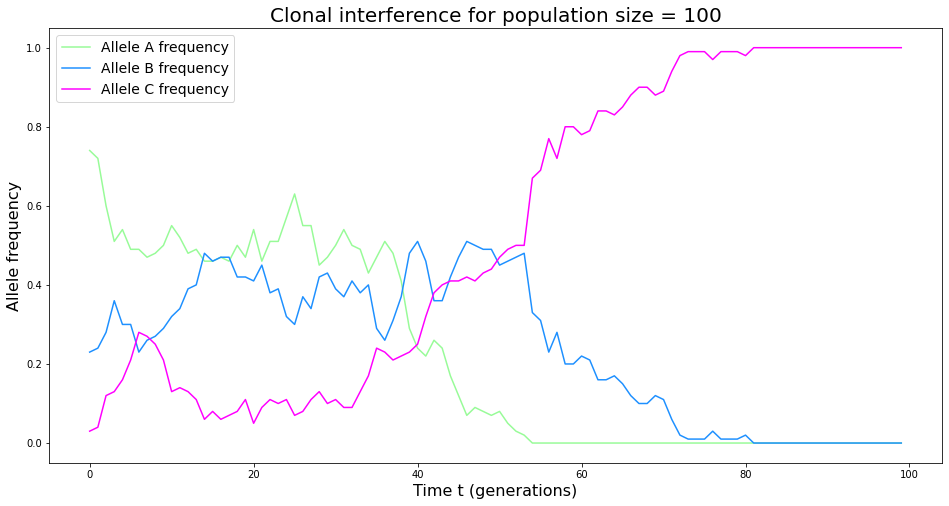

In [130]:
plt.figure(figsize=(16, 8))
plt.plot(range(100), A_freq_100[:100], label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(100), B_freq_100[:100], label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(100), C_freq_100[:100], label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 100', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [151]:
CI_pop_200, A_freq_200, B_freq_200, C_freq_200 = clonal_interference_simulation(200, 1000, 0, 0.05, 0.1)

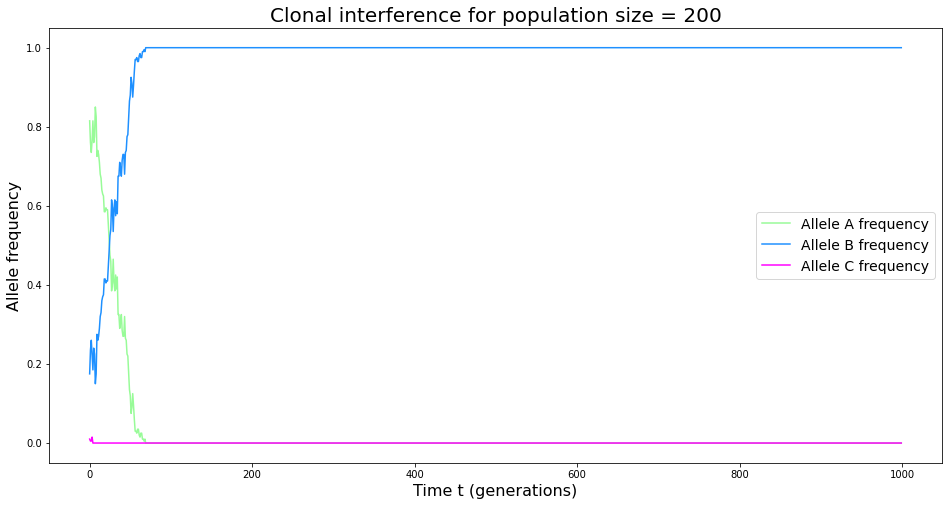

In [152]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(A_freq_200)), A_freq_200, label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(len(A_freq_200)), B_freq_200, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(len(A_freq_200)), C_freq_200, label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 200', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [153]:
CI_pop_200[0]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0])

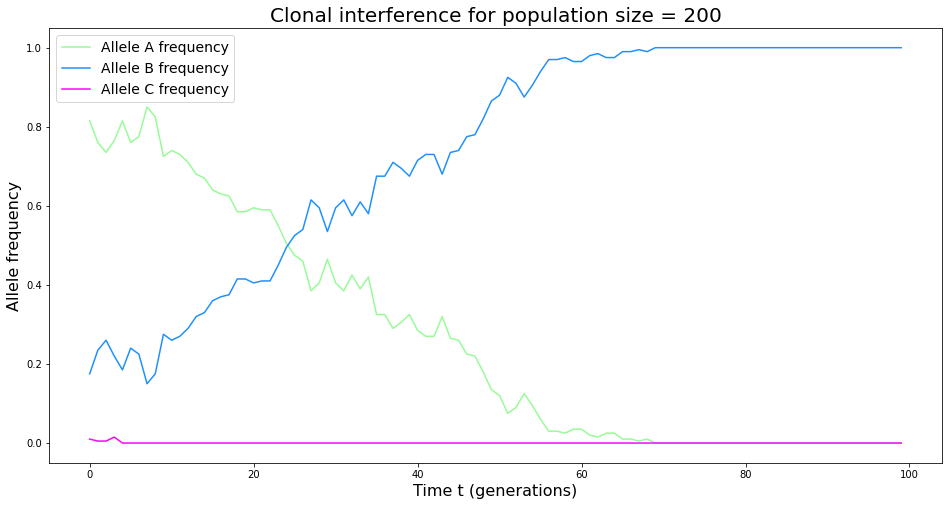

In [154]:
plt.figure(figsize=(16, 8))
plt.plot(range(100), A_freq_200[:100], label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(100), B_freq_200[:100], label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(100), C_freq_200[:100], label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 200', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [157]:
C_freq_200[:5]

[0.01, 0.005, 0.005, 0.015, 0.0]

In [164]:
CI_pop_1000, A_freq_1000, B_freq_1000, C_freq_1000 = clonal_interference_simulation(1000, 10000, 0, 0.05, 0.1)

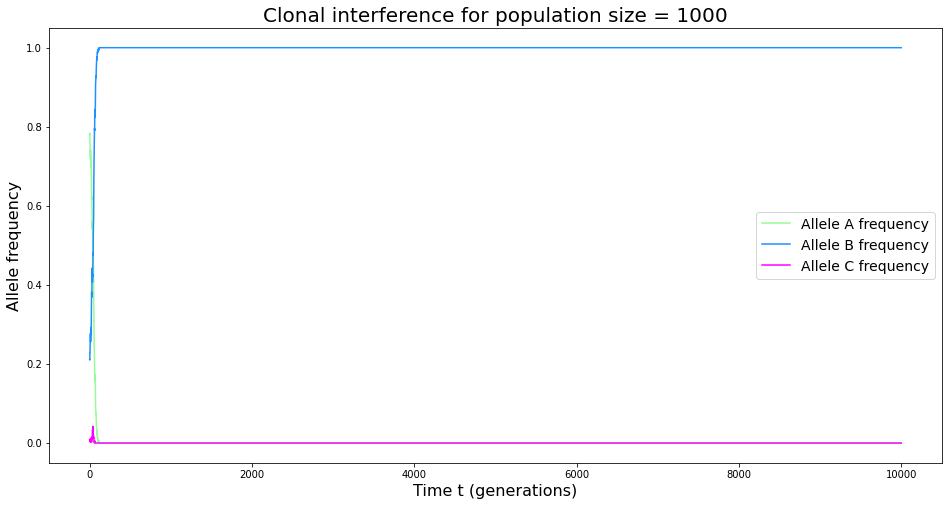

In [165]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(A_freq_1000)), A_freq_1000, label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(len(B_freq_1000)), B_freq_1000, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(len(C_freq_1000)), C_freq_1000, label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 1000', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

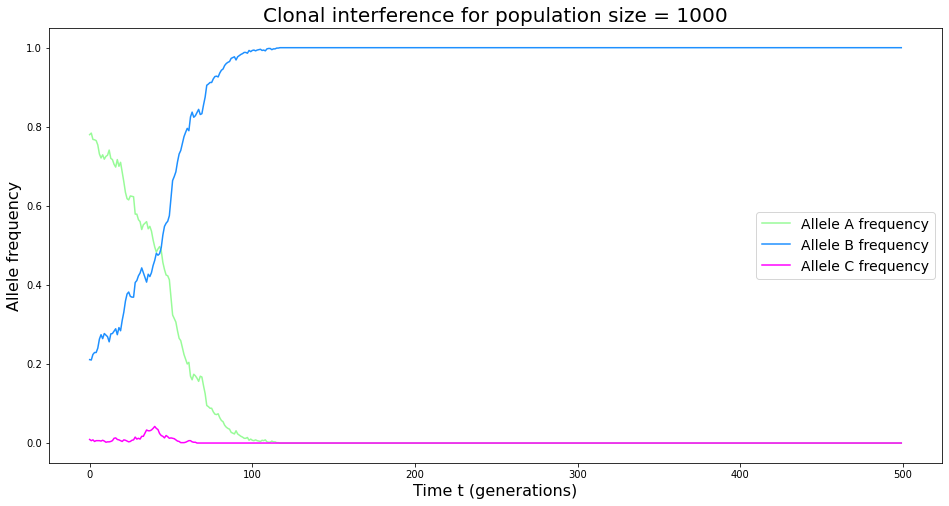

In [166]:
plt.figure(figsize=(16, 8))
plt.plot(range(500), A_freq_1000[:500], label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(500), B_freq_1000[:500], label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(500), C_freq_1000[:500], label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 1000', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [173]:
CI_pop_10000, A_freq_10000, B_freq_10000, C_freq_10000 = clonal_interference_simulation(10000, 10000, 0, 0.05, 0.1)

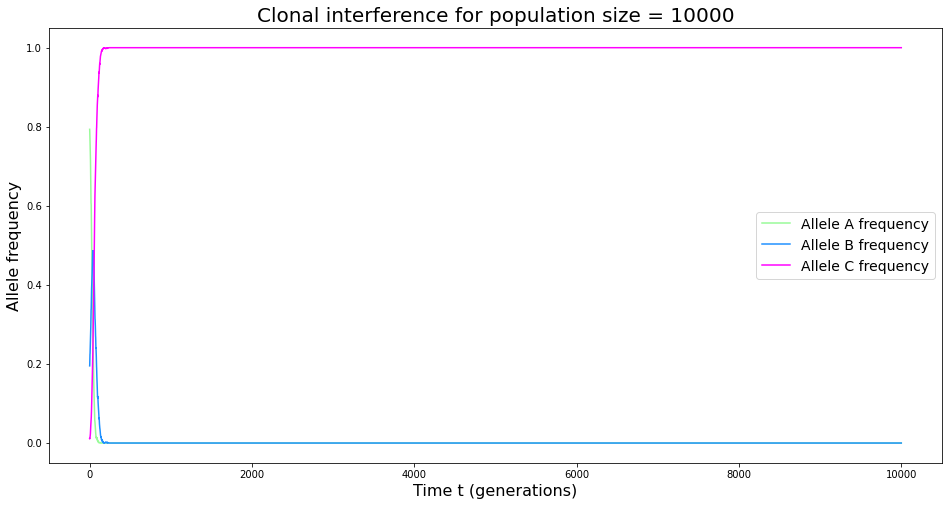

In [174]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(A_freq_10000)), A_freq_10000, label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(len(B_freq_10000)), B_freq_10000, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(len(C_freq_10000)), C_freq_10000, label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 10000', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

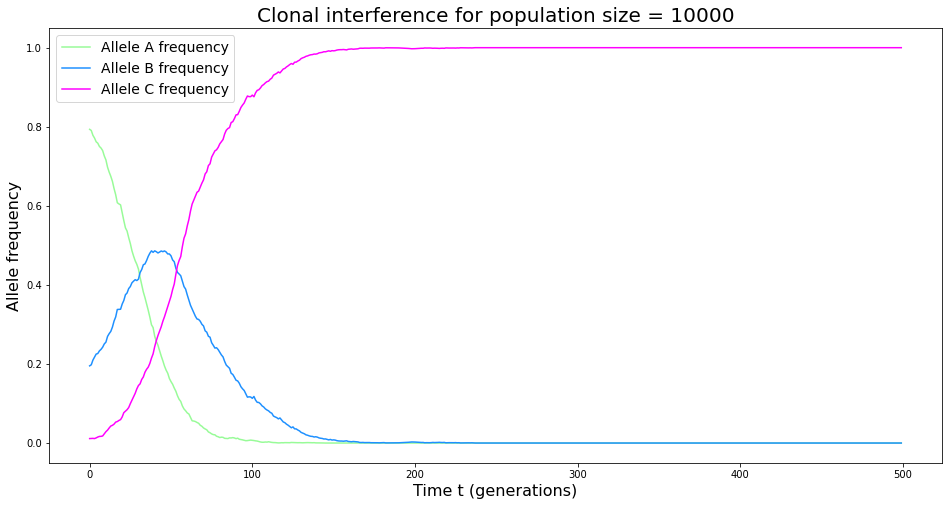

In [175]:
plt.figure(figsize=(16, 8))
plt.plot(range(500), A_freq_10000[:500], label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(500), B_freq_10000[:500], label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(500), C_freq_10000[:500], label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 10000', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [253]:
CI_pop_100000, A_freq_100000, B_freq_100000, C_freq_100000 = clonal_interference_simulation(100000, 300, 0, 0.05, 0.1)

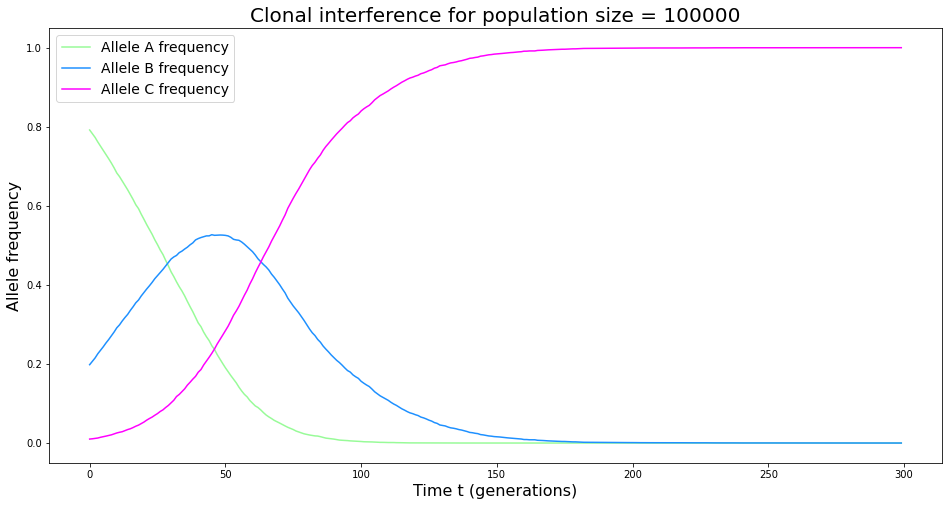

In [254]:
plt.figure(figsize=(16, 8))
plt.plot(range(len(A_freq_100000)), A_freq_100000, label='Allele A frequency', linestyle='-', color='palegreen')
plt.plot(range(len(B_freq_100000)), B_freq_100000, label='Allele B frequency', linestyle='-', color='dodgerblue')
plt.plot(range(len(C_freq_100000)), C_freq_100000, label='Allele C frequency', linestyle='-', color='magenta')
plt.title ('Clonal interference for population size = 100000', fontsize=20)
plt.xlabel('Time t (generations)', fontsize=16)
plt.ylabel('Allele frequency', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [ ]:
# simulations for different population size

In [224]:
def simulate_CI(pop_size, num_gener, num_of_simulation):
    results = np.zeros(num_of_simulation)
    for i in range(num_of_simulation):
        CI_pop, A_freq, B_freq, C_freq = clonal_interference_simulation(pop_size, num_gener, 0, 0.05, 0.1)
        last_generation_freq = [A_freq[-1], B_freq[-1], C_freq[-1]]
        max_frequency = max(last_generation_freq)
        max_index = last_generation_freq.index(max_frequency)
        results[i] = max_index
    A_fix = np.sum(results == 0)/ len(results) 
    B_fix = np.sum(results == 1)/ len(results)
    C_fix = np.sum(results == 2)/ len(results) 
    print (f'A fixed in {A_fix} %')
    print (f'B fixed in {B_fix} %')
    print (f'C fixed in {C_fix} % \n')
    return A_fix, B_fix, C_fix

In [213]:
for n in range (100, 1500, 200):
    print (f'For population size = {n} : \n')
    simulate_CI(n, 1000, 500)

For population size = 100 : 

A fixed in 0.122 %
B fixed in 0.734 %
C fixed in 0.144 %
For population size = 300 : 

A fixed in 0.002 %
B fixed in 0.626 %
C fixed in 0.372 %
For population size = 500 : 

A fixed in 0.0 %
B fixed in 0.458 %
C fixed in 0.542 %
For population size = 700 : 

A fixed in 0.0 %
B fixed in 0.346 %
C fixed in 0.654 %
For population size = 900 : 

A fixed in 0.0 %
B fixed in 0.282 %
C fixed in 0.718 %
For population size = 1100 : 

A fixed in 0.0 %
B fixed in 0.216 %
C fixed in 0.784 %
For population size = 1300 : 

A fixed in 0.0 %
B fixed in 0.164 %
C fixed in 0.836 %


In [215]:
def clonal_interference_stop(pop_size, s1, s2, s3):
    
    # initial A frequency
    pA_0 = 0.79
    # initial B frequency
    pB_0  = 0.2
    # initial C frequency
    pC_0  = 0.01
    
    population = np.random.choice([0, 1, 2], size = pop_size, p = [pA_0, pB_0, pC_0])
    populations = []
    populations.append(population)
    
    A_freq = []
    B_freq = []
    C_freq = []
    
    flag = 0
    t = 0
    
    while flag == 0:
        # calculate allele frequencies 
        freq_A = np.sum(population == 0) / pop_size
        freq_B = np.sum(population == 1) / pop_size
        freq_C = np.sum(population == 2) / pop_size
        
        A_freq.append(freq_A)
        B_freq.append(freq_B)
        C_freq.append(freq_C)
        
        if (freq_A == 1) or (freq_B == 1) or (freq_C == 1):
            flag = 1
        
        sum_to_normalise = (1 + s1) * freq_A + (1 + s2) * freq_B + (1 + s3) * freq_C
        
        pA_next = ((1 + s1) * freq_A) / sum_to_normalise
        pB_next = ((1 + s2) * freq_B ) / sum_to_normalise
        pC_next = ((1 + s3) * freq_C) / sum_to_normalise
        
        next_generation = np.random.choice([0, 1, 2], size = pop_size, p = [pA_next, pB_next, pC_next])
        populations.append(next_generation)
        population = next_generation
        t +=1
    return t

In [219]:
def when_to_stop(pop_size):
    times = np.zeros(1000)
    for i in range(1000):
        times[i] = clonal_interference_stop(pop_size, 0, 0.05, 0.1)
    print (f'For popoulation size = {pop_size}, we need {np.mean(times)} +- {np.std(times)} generation in average')

In [236]:
pop_sizes = [100, 300, 500, 700, 1000, 2000, 4000, 5000, 6000, 8000]

In [255]:
for n in pop_sizes:
    when_to_stop(n)

For popoulation size = 100, we need 82.007 +- 40.858890721604276 generation in average
For popoulation size = 300, we need 122.299 +- 40.799774496925835 generation in average
For popoulation size = 500, we need 137.72 +- 39.10170840257494 generation in average
For popoulation size = 700, we need 151.716 +- 41.80690545830916 generation in average
For popoulation size = 1000, we need 167.353 +- 40.01077843531665 generation in average
For popoulation size = 2000, we need 191.171 +- 36.37842436115121 generation in average
For popoulation size = 4000, we need 209.287 +- 33.931174913344805 generation in average
For popoulation size = 5000, we need 211.926 +- 31.367858135358876 generation in average
For popoulation size = 6000, we need 215.346 +- 31.414841779006306 generation in average
For popoulation size = 8000, we need 220.068 +- 29.470550995867043 generation in average


In [223]:
for n in pop_sizes:
    print (f'For population size = {n} : \n')
    simulate_CI(n, 300, 1000)

For population size = 100 : 

A fixed in 0.136 %
B fixed in 0.748 %
C fixed in 0.116 % 

For population size = 300 : 

A fixed in 0.003 %
B fixed in 0.66 %
C fixed in 0.337 % 

For population size = 500 : 

A fixed in 0.0 %
B fixed in 0.454 %
C fixed in 0.546 % 

For population size = 700 : 

A fixed in 0.0 %
B fixed in 0.381 %
C fixed in 0.619 % 

For population size = 1000 : 

A fixed in 0.0 %
B fixed in 0.241 %
C fixed in 0.759 % 

For population size = 2000 : 

A fixed in 0.0 %
B fixed in 0.061 %
C fixed in 0.939 % 

For population size = 5000 : 

A fixed in 0.0 %
B fixed in 0.001 %
C fixed in 0.999 % 

For population size = 10000 : 

A fixed in 0.0 %
B fixed in 0.0 %
C fixed in 1.0 % 



In [237]:
allele_A_won = []
allele_B_won = []
allele_C_won = []

for n in pop_sizes:
    print (f'For population size = {n} : \n')
    a, b, c = simulate_CI(n, 300, 1000)
    allele_A_won.append(a)
    allele_B_won.append(b)
    allele_C_won.append(c)

For population size = 100 : 

A fixed in 0.136 %
B fixed in 0.717 %
C fixed in 0.147 % 

For population size = 300 : 

A fixed in 0.002 %
B fixed in 0.639 %
C fixed in 0.359 % 

For population size = 500 : 

A fixed in 0.0 %
B fixed in 0.455 %
C fixed in 0.545 % 

For population size = 700 : 

A fixed in 0.0 %
B fixed in 0.327 %
C fixed in 0.673 % 

For population size = 1000 : 

A fixed in 0.0 %
B fixed in 0.225 %
C fixed in 0.775 % 

For population size = 2000 : 

A fixed in 0.0 %
B fixed in 0.048 %
C fixed in 0.952 % 

For population size = 4000 : 

A fixed in 0.0 %
B fixed in 0.003 %
C fixed in 0.997 % 

For population size = 5000 : 

A fixed in 0.0 %
B fixed in 0.002 %
C fixed in 0.998 % 

For population size = 6000 : 

A fixed in 0.0 %
B fixed in 0.0 %
C fixed in 1.0 % 

For population size = 8000 : 

A fixed in 0.0 %
B fixed in 0.0 %
C fixed in 1.0 % 



In [238]:
allele_C_won

[0.147, 0.359, 0.545, 0.673, 0.775, 0.952, 0.997, 0.998, 1.0, 1.0]

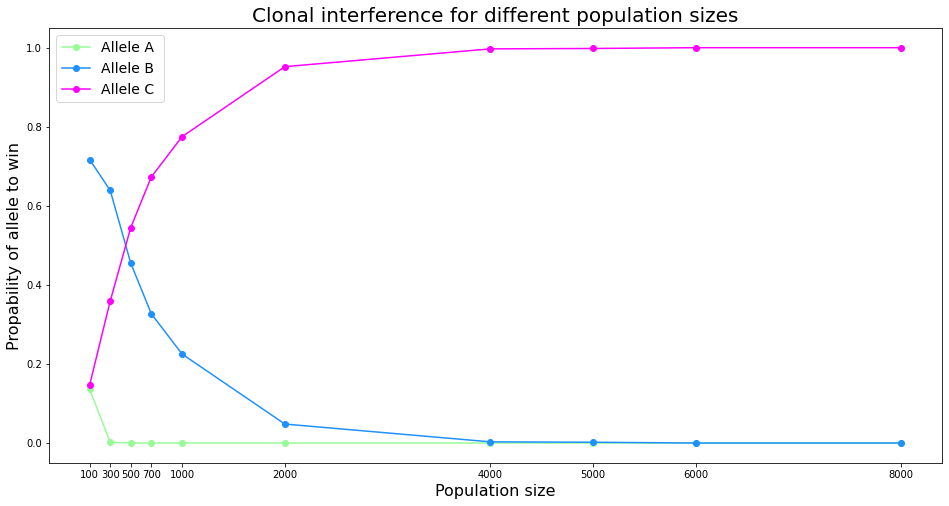

In [252]:
plt.figure(figsize=(16, 8))
plt.plot(pop_sizes, allele_A_won, label='Allele A ', linestyle='-', marker = 'o', color='palegreen')
plt.plot(pop_sizes, allele_B_won, label='Allele B ', linestyle='-', marker = 'o', color='dodgerblue')
plt.plot(pop_sizes, allele_C_won, label='Allele C ', linestyle='-',marker = 'o', color='magenta')
plt.title ('Clonal interference for different population sizes', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.ylabel('Propability of allele to win', fontsize=16)
plt.xticks(pop_sizes)
plt.legend(fontsize=14)
plt.show()

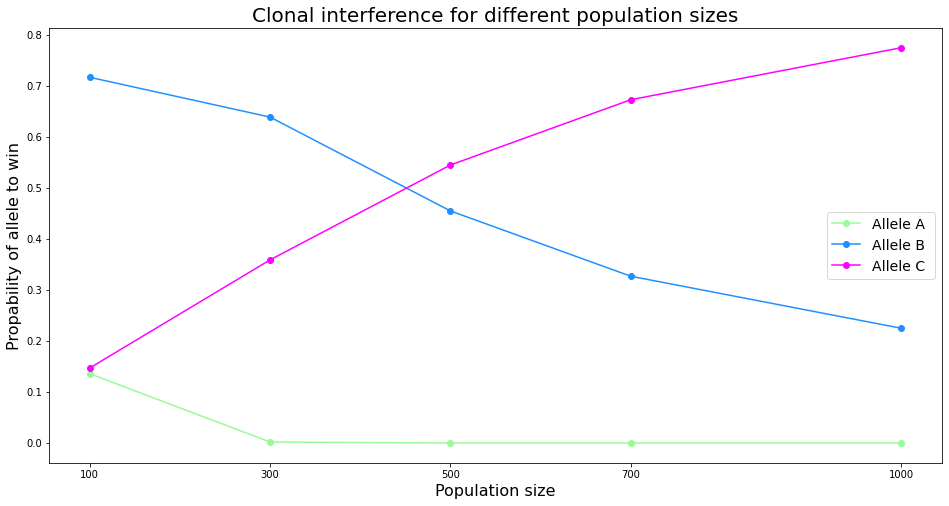

In [250]:
plt.figure(figsize=(16, 8))
plt.plot(pop_sizes[:5], allele_A_won[:5], label='Allele A ', linestyle='-', marker = 'o', color='palegreen')
plt.plot(pop_sizes[:5], allele_B_won[:5], label='Allele B ', linestyle='-',marker = 'o', color='dodgerblue')
plt.plot(pop_sizes[:5], allele_C_won[:5], label='Allele C ', linestyle='-',marker = 'o', color='magenta')
plt.title ('Clonal interference for different population sizes', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.xticks(pop_sizes[:5])
plt.ylabel('Propability of allele to win', fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [243]:
pop_sizes

[100, 300, 500, 700, 1000, 2000, 4000, 5000, 6000, 8000]

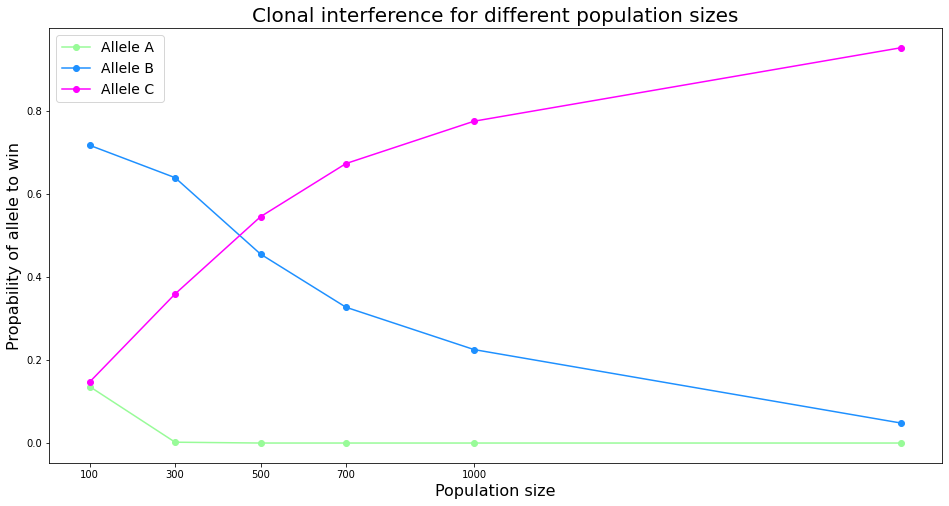

In [251]:
plt.figure(figsize=(16, 8))
plt.plot(pop_sizes[:6], allele_A_won[:6], label='Allele A ', linestyle='-', marker = 'o', color='palegreen')
plt.plot(pop_sizes[:6], allele_B_won[:6], label='Allele B ', linestyle='-',marker = 'o', color='dodgerblue')
plt.plot(pop_sizes[:6], allele_C_won[:6], label='Allele C ', linestyle='-',marker = 'o', color='magenta')
plt.title ('Clonal interference for different population sizes', fontsize=20)
plt.xlabel('Population size', fontsize=16)
plt.xticks(pop_sizes[:5])
plt.ylabel('Propability of allele to win', fontsize=16)
plt.legend(fontsize=14)
plt.show()

# 6. Population structure

In [270]:
# pop_size - population size, num_of_generation - number of generation, p - allele A frequency, 

def sub_population_simulation(pop_size, num_of_generation, p):
    
    # allele B frequency
    q = 1 - p
    
    population = np.random.choice([0, 1], size = pop_size, p = [p, q])
    split_population = np.array_split(population, 10)
    sub_pop_size = len(split_population[0])
    populations = []
    populations.append(split_population)
    
    A_freq = []
    B_freq = []
    
    
    for generation in range(num_of_generation):
        # calculate allele frequencies 
        a_freq, b_freq = freq_subpop(populations[-1])

        A_freq.append(a_freq)
        B_freq.append(b_freq)
        
        next_generation = []
        for i in range(10):
            
            next_generation.append(np.random.choice(populations[-1][i], size=sub_pop_size))
        
        populations.append(next_generation)
        
    return populations, A_freq, B_freq

In [275]:
pop_check, a_check, b_check = sub_population_simulation(100, 5, 0.5)

In [279]:
pop_check[2]

[array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1]),
 array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1]),
 array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1]),
 array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0])]

In [281]:
a_check[2]

array([0.5, 0.4, 0.5, 0.6, 0.9, 0.4, 0.5, 0.8, 0.2, 0.3])

In [282]:
b_check[2]

array([0.5, 0.6, 0.5, 0.4, 0.1, 0.6, 0.5, 0.2, 0.8, 0.7])

In [256]:
# Parameters
pop_size = 100
p = 0.7
q = 0.3

# Generate the population array
population = np.random.choice([0, 1], size=pop_size, p=[p, q])

# Split the population array into 10 smaller arrays
split_arrays = np.array_split(population, 10)

In [258]:
for subpop in split_arrays:
    print (subpop)

[0 1 1 0 0 1 0 0 1 0]
[1 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 1 0 0]
[0 1 0 0 0 1 0 1 1 0]
[0 0 0 0 1 0 1 0 0 1]
[0 1 0 0 0 1 1 0 1 0]
[0 0 0 1 1 0 1 0 0 0]
[0 0 0 1 1 1 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[1 0 1 1 1 0 0 0 0 0]


In [259]:
len(split_arrays)

10

In [264]:
populations = []
populations.append(split_arrays)
populations.append(split_arrays)
populations

[[array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0]),
  array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1]),
  array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
  array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
  array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
  array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
  array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
  array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
  array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])],
 [array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0]),
  array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1]),
  array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
  array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
  array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
  array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
  array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
  array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
  array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])]]

In [266]:
populations

[[array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0]),
  array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1]),
  array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
  array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
  array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
  array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
  array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
  array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
  array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])],
 [array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0]),
  array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1]),
  array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
  array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
  array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
  array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
  array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
  array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
  array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])]]

In [265]:
def freq_subpop(subpop):
    freq_a = np.zeros(10)
    freq_b = np.zeros(10)
    
    for i in range(10):
        this_subpop = subpop[i]
        a = np.sum(this_subpop == 0) / (len(this_subpop))
        b = np.sum(this_subpop == 1) / (len(this_subpop))
        freq_a[i] = a
        freq_b[i] = b
        
    return freq_a, freq_b

In [267]:
a_check, b_check = freq_subpop(populations[-1])

In [268]:
print (a_check, b_check)

[0.6 0.6 0.7 0.6 0.7 0.6 0.7 0.6 0.9 0.6] [0.4 0.4 0.3 0.4 0.3 0.4 0.3 0.4 0.1 0.4]


In [269]:
populations[-1]

[array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])]